# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression 
- Regularized Logistic Regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [1]:
### Import and rename libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.2 - Data Preparation ##

Prepare the data for regression task. **(15 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.
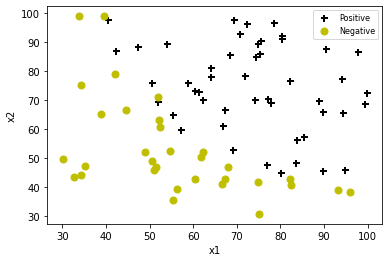

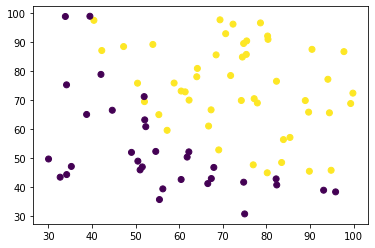

In [21]:
### Preprocess input data and generate plots

data = pd.read_csv('data_logistic.csv')
data.head()
X1 = data.iloc[:,0]
X2 = data.iloc[:,1]
X = data.iloc[:,0:2]

X = X.to_numpy()

#X = np.array([X1],[X2])
Y = data.iloc[:,2]
Y = Y.to_numpy()

plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

# first two columns; x = feature data
# y = ... # third column; y = label
def plotData(X, y):
    plt.scatter(X[:,0],X[:,1], c=Y)
    # You may implement it with the function above or your own preference


### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(15 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X). 

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:
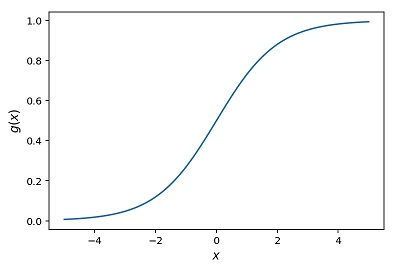

In [3]:
### Implement sigmoid fuction here

def sigmoid(z):
    return 1/(1 + np.exp(- z))
    

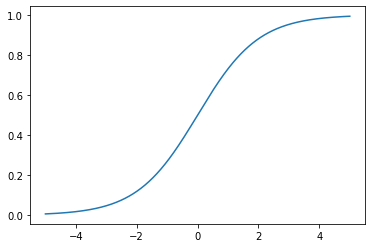

In [4]:


xx = np.linspace(-5, 5, 1000)
plt.plot(xx, sigmoid(xx))
plt.show()



### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(30 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.
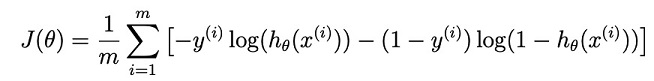
2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.
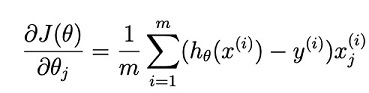
3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):
 
        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2) 
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1 
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [5]:
# Implement the cost function here

def cal_cost(theta, x, y):
    #htheta = sigmoid(theta)
    #htheta = np.matmul(x, sigmoid(theta))
    htheta = sigmoid(np.matmul(x, theta))
    term1 = np.matmul(np.log(htheta), y)  # matrix_multiplication(log(htheta), y)
    term2 = np.matmul(np.log(1 - htheta + 1e-15), (1 - y))  # matrix_multiplication(log(1-htheta+eps), (1-y))
    J = - 1 / m * (term1 + term2) 
    
    return J


def cal_grad(theta, X, y):

    # compute the hypothesis
    htheta = sigmoid(np.matmul(X, theta))
    
    term1 = np.matmul(np.transpose(X), (htheta - y)) # matrix_multiplication(transpose(X), (htheta - y)); you may think about why transpose(x)

    # gradient
    grad = 1 / m * term1
    
    return grad


###  m, n = shape(feature data x), and thus, m = number of data and n = 2
m = len(X)
n = 2
# # initalize intercept terms
x = np.hstack((np.ones((m, 1)), X)) # x is feature data (see the data loading block)
# # initalize theta
initial_theta = np.zeros(n+1) 
print(initial_theta)

# # compute and display initial cost and gradient
J = cal_cost(initial_theta, x, Y) # y is label (see the data loading block)
grad = cal_grad(initial_theta, x, Y)
    
print ('Cost at initial theta: {0}'.format(J))
print ('Gradient at inital theta:\n {0}'.format(grad))


[0. 0. 0.]
Cost at initial theta: 0.6931471805599445
Gradient at inital theta:
 [ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(10 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample: 
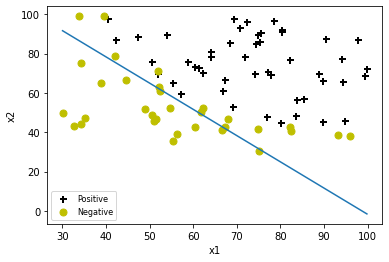
5. It may take ~1 min to finish running.

In [6]:
# Gradient Descent Implementation Here

theta = initial_theta
lr = 0.001

for epoch in range(80000):
    J = cal_cost(theta, x, Y)
    grad = cal_grad(theta, x, Y)
    theta = theta - lr*grad
    if epoch < 5:
        print("theta {}: {}".format(epoch,theta) )
        print("cost {}: {}".format(epoch, J))

print ('Theta: {0}'.format(theta))
print ('Cost: {0}'.format(cal_cost(theta, x, Y)))


theta 0: [0.0001     0.01091242 0.01173653]
cost 0: 0.6931471805599445
theta 1: [-0.0001129   0.00053949  0.00229352]
cost 1: 0.6996118077359638
theta 2: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]
cost 2: 0.6649331468590681
theta 3: [-0.0002356   0.0004607   0.00370829]
cost 3: 0.667991436499246
theta 4: [-0.00020363  0.00683227  0.01065138]
cost 4: 0.6545873034874964
Theta: [-3.88329777  0.02947987  0.03935448]
Cost: 0.43838894881827817


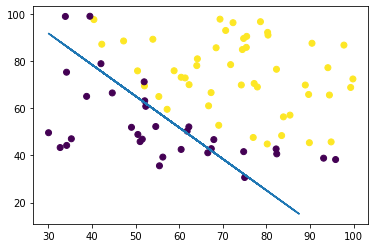

In [13]:
# Draw Decision Boundary Here

def plotDecisionBoundary(theta, X, y):
    plotData(X, y)
    # get min and max values
    xx = np.minimum(X[:,0],X[:,1])
    # get boundary of separation
    yy =(-theta[0]-xx*theta[2])/theta[1]
    plt.plot(xx, yy) 

plotDecisionBoundary(theta, X, Y)


### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(10 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5). 
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [24]:
### Evaluate the model


p_list = []
for i in range(m):
    x1_pred = X[i,0]
    x2_pred = X[i,1]
    if sigmoid(x1_pred*theta[1] + x2_pred*theta[2] + theta[0])>0.5:
        p_list.append(1)
    else:
        p_list.append(0)


## Get training accuracy
print ('Training Accuracy: {0}'.format(np.mean(p_list==Y)*100)) # example for reference

# ## Get predicted probability
prob = sigmoid(56*theta[1] + 32*theta[2] + theta[0])
print ('Probablity of acceptance for exam 1 score: {0} and exam 2 score: {1} is {2} percent.'.format(56, 32, prob*100)) # example for reference


Training Accuracy: 85.0
Probablity of acceptance for exam 1 score: 56 and exam 2 score: 32 is 27.20569047311216 percent.


### 1.7 - Cost function and gradient with regularization

Implement the cost function and gradient for regularized logistic regression. **(10 points)**

**Tasks:**
1. Implement the "cal_reg_cost" to compute the cost.
2. Implement the "cal_reg_grad" to compute the gradients.
3. Test the the two functions with initial values.

**Hint:**
1. The regularized cost function in logistic regression is similar to the previous one, but with a regularization term. 
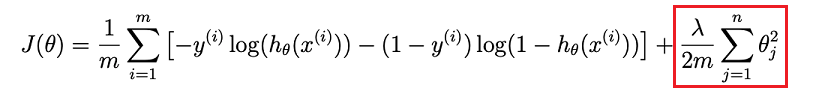
2. The gradient of the cost is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined as follows. Here, the first constant term will not be regularized. The reason could be found in ***The Elements of Statistical Learning by Hastie et al. (P.63-64)*** if you are curious.
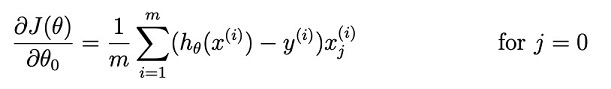
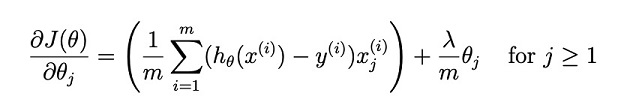
3. Use **eps = 1e-15** to prevent divide by 0 exception. Set regularization parameter **lam** to **1** and **zero out**
the first lam; think about the reason.

    def cal_reg_cost(theta, X, y, lam):
        htheta = ...
        term1 = ...
        term2 = ...
        term3 =  ...
        J = - 1 / m * (term1 + term2 - term3) 
        
        return cost
    
    def cal_reg_grad(theta, X, y, lam):
    
        htheta = ...
        term1 = ...
        term2 = ...
        grad = 1 / m * (term1 + term2)
    
        return grad
    

5. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values, which should be the same as the ones in section 1.4.\
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]

In [11]:
### Implement the cost function here

def cal_reg_cost(theta, X, y, lam):

    # make an array of lambdas 
    lamarray = np.ones(len(theta)) * lam
    
    # zero out first element so se don't regularize constant term; think about the reason.
    lamarray[0] = 0.0
    eps = 1e-15

    # compute the hypothesis
    htheta = sigmoid(np.matmul(X, theta))
    # compute J in three terms
    term1 = np.matmul(np.log(htheta), y)  # matrix_multiplication(log(htheta), y)
    term2 = np.matmul(np.log(1 - htheta + 1e-15), (1 - y))
    term3 = np.matmul(np.transpose(lamarray), theta*theta)/(2*m)

    # cost function
    J = - 1 / m * (term1 + term2 - term3) 
    
    return J

############################################
def cal_reg_grad(theta, X, y, lam):

    lamarray = np.ones(len(theta)) * lam
    # zero out first element ; think about the reason.
    lamarray[0] = 0.0

    # compute the hypothesis
    htheta = sigmoid(np.matmul(X, theta))
    
    term1 = np.matmul(np.transpose(X), (htheta - y))
    term2 = np.matmul(theta, lamarray)
    grad = 1 / m * (term1 + term2)
    return grad
    

#########################################################
# initalize theta
initial_theta = np.zeros(n+1)

# set regularization parameter to 1
lam = 1

# compute and display initial cost and gradient
J = cal_reg_cost(initial_theta, x, Y, lam)
grad = cal_reg_grad(initial_theta, x, Y, lam)
print ('Cost at initial theta: {0}'.format(J))
print ('Gradient at inital theta:\n {0}'.format(grad))



Cost at initial theta: 0.6931471805599445
Gradient at inital theta:
 [ -0.1        -10.91242026 -11.73652937]


## 1.8 Train parameters with Gradient Descent ##


Train parameters with Gradient Descent. **(10 Points)**

**Tasks:**
1. Implement GD function to optimize parameters.
2. **Calculate best fit theta** by Gradient Descent with learning rate of **0.001 (1e-3)**, epoch of **80K**, and lambda **1**. 
3. **PRINT OUT** the best theta (the last one is considered as the best here) and its corresponding cost.

**Hints:**
1. The initial theta from above blocks is used as initial values.
2. Validation results for first 5 epochs:\
------Epoch 0------\
Best fit theta: \
[0.0001     0.01091242 0.01173653]\
Cost function at best fit theta: 0.6996134129049489\
------Epoch 1------\
Best fit theta:\
[-0.0001129   0.00053935  0.00229338]\
Cost function at best fit theta: 0.6649354888127291\
------Epoch 2------\
Best fit theta: \
[-5.93558681e-05  8.33163330e-03  1.07755735e-02]\
Cost function at best fit theta: 0.667994967854362\
------Epoch 3------\
Best fit theta: \
[-0.0002356   0.00046054  0.00370807]\
Cost function at best fit theta: 0.6545900033839479\
------Epoch 4------\
Best fit theta: \
[-0.00020362  0.00683253  0.01065154]\
Cost function at best fit theta: 0.656333864181721

3. It may take less than 1 min to finish running.

In [15]:
# Learning and print the result here

theta = initial_theta
lr = 0.001
lam = 1

for epoch in range(80000):
    J = cal_reg_cost(theta, x, Y, lam)
    grad = cal_reg_grad(theta, x, Y, lam)
    theta = theta - lr*grad
    if epoch < 5:
        print("theta {}: {}".format(epoch,theta) )
        print("cost {}: {}".format(epoch, J))
        
print ('Best fit theta: {0}'.format(theta))
print ('Cost function at best fit theta: {0}'.format(cal_reg_cost(theta, x, Y, lam)))


theta 0: [0.0001     0.01091242 0.01173653]
cost 0: 0.6931471805599445
theta 1: [-0.00011318  0.0005392   0.00229324]
cost 1: 0.6996118278005761
theta 2: [-5.96696861e-05  8.33178127e-03  1.07757506e-02]
cost 2: 0.6649377699622119
theta 3: [-0.00023616  0.00046031  0.00370791]
cost 3: 0.6679961837641072
theta 4: [-0.00020422  0.0068327   0.01065181]
cost 4: 0.6545924917437042
Best fit theta: [-3.91754743  0.02974753  0.03960856]
Cost function at best fit theta: 0.43716030074058204
